In [1]:
import re, nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from wordcloud import WordCloud
from PIL import Image

In [4]:
with open("Quo_vadis.txt", encoding="utf8") as myfile:
    data = " ".join(line.rstrip() for line in myfile)

In [5]:
print(data[:200])

Henryk Sienkiewicz  Quo vadis  ISBN 978-83-288-2832-2     Rozdział pierwszy  Petroniusz obudził się zaledwie koło południa i jak zwykle, zmęczony bardzo. Poprzedniego dnia był na uczcie u Nerona, któr


In [6]:
with open("stopwords_pl.txt", encoding="utf8") as myfile:
    stop_text = " ".join(line.rstrip() for line in myfile)

stopWords = set(stop_text.split(" "))


In [7]:
text = re.sub(r"[^\w]+", " ", data).split(" ")

chapters = [[]]

i = 0

for word in text:
    if word == "Rozdział":
        chapters.append([])
        i += 1
    
    if word not in stopWords and len(word) > 1 and word[0] != "'":
        chapters[i].append(word.lower())
    
print(chapters[0])
chapters = chapters[1:]
    

['henryk', 'sienkiewicz', 'quo', 'vadis', 'isbn', '978', '83', '288', '2832']


In [8]:
count_all_chapters = {}
for word in [word for chapter in chapters for word in chapter]:
    count_all_chapters.setdefault(word, 0)
    count_all_chapters[word] = count_all_chapters[word] + 1

In [9]:
chapters_tfs = []
chapters_word_counts = []
book_word_counts = {}

for chapter in chapters[1:]:
    chapter_count = {}
    total = len(chapter)
    
    for word in chapter:
        chapter_count.setdefault(word, 0)
        chapter_count[word] = chapter_count[word] + 1
        
        book_word_counts.setdefault(word, 0)
        book_word_counts[word] = book_word_counts[word] + 1
        
    chapters_word_counts.append(chapter_count)     
    chapters_tfs.append({word:(count/total) for (word, count) in chapter_count.items()})


In [10]:
chapters_tf_idfs = []

for chapter_tf in chapters_tfs:
    chapter_tf_idf = {}
    for word, tf in chapter_tf.items():
        docs_with_term = np.sum([1 for chap in chapters_tfs if word in chap.keys()])
        chapter_tf_idf.setdefault(word, tf*np.log(len(chapters_tfs)/docs_with_term))
    
    chapters_tf_idfs.append(chapter_tf_idf)

In [11]:
# print(sorted([x for x in chapters_tf_idfs[13].items()], key=lambda x: x[1], reverse=True))

In [12]:
import os

def save_word_cloud(chapter, number_of_chapter=0, name=""): 
    
    if 'results' not in os.listdir():
        os.mkdir('results')
    
    path = os.getcwd() + '\\results'
    counts_list = [(word, c) for word, c in zip(chapter.keys(), chapter.values())]
    counts_list.sort(key = lambda x: x[1], reverse=True)
    wc_dict = {w: c for w,c in counts_list[:64]}
    mask = np.array(Image.open("storm.png"))
    cloud = WordCloud(background_color="white", mask=mask, max_words=100)
    cloud.generate_from_frequencies(wc_dict)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    if name == "":
        cloud.to_file("{}\\chapter_{}_cloud.png".format(path, number_of_chapter))
    else:
        cloud.to_file("{}\\{}.png".format(path, name))  

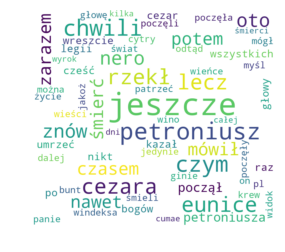

In [67]:
# for chap_n, chapter in enumerate(chapters_word_counts):
#     save_word_cloud(chapter, chap_n+1)

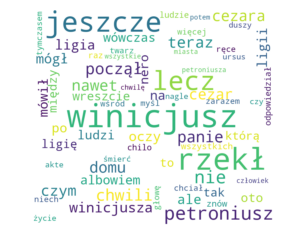

In [70]:
# save_word_cloud(book_word_counts, name='whole_book')

# Task 2

In [23]:
chapters_highest_tf_idfs = []

for chapter in chapters_tf_idfs:
    chap_words = [item for item in chapter.items()]
    chapters_highest_tf_idfs.append(sorted(chap_words, key=lambda x: x[1], reverse=True)[:20])


In [22]:
print(chapters_highest_tf_idfs[0])

[('aulus', 0.008872260970876159), ('mały', 0.00465953553625396), ('aulusa', 0.00417277561102128), ('plaucjusz', 0.004121680560374588), ('tablinum', 0.0037712799072502703), ('ruinę', 0.0037712799072502703), ('forum', 0.00332709786407856), ('świątyni', 0.00324549214190544), ('vicus', 0.003239112070712797), ('spotkałem', 0.0031620090189760732), ('tle', 0.0031620090189760732), ('kapłanów', 0.0029284500110405343), ('wierszy', 0.0029284500110405343), ('petroniusz', 0.0028266078601499375), ('pełno', 0.0028056083965545984), ('wieczornych', 0.0028056083965545984), ('piłkę', 0.0028056083965545984), ('chryzotemis', 0.0027477870402497252), ('słuchała', 0.0025912896565702375), ('piasku', 0.0025912896565702375)]


In [18]:
def find_chapters(word, chapters):
    chaps_list = []
    for i,chapter in enumerate(chapters):
        chaps_list.append((i, chapter.get(word.lower(), -1)))
    
    return sorted(chaps_list, key=lambda x: x[1], reverse=True)

In [19]:
find_chapters("Petroniusz", chapters_tf_idfs)

[(63, 0.007269619443872319),
 (10, 0.004098608083469865),
 (55, 0.003929181682968346),
 (49, 0.003893144724250095),
 (3, 0.00351574804179728),
 (12, 0.0032550042602912353),
 (11, 0.0030762795365726196),
 (33, 0.003074038983377738),
 (35, 0.0028280993863425592),
 (0, 0.0028266078601499375),
 (1, 0.002797915494980202),
 (66, 0.0027966177605205636),
 (45, 0.002795753272804792),
 (27, 0.0023214224428961764),
 (38, 0.002223269871564283),
 (50, 0.0021431900088918253),
 (59, 0.002111911695860713),
 (47, 0.002102564447206823),
 (8, 0.0019987318977952493),
 (53, 0.0019080721176209922),
 (30, 0.001873487692910099),
 (48, 0.0017962784185746779),
 (29, 0.0017630140034158874),
 (39, 0.0017630140034158874),
 (57, 0.0015784052072466846),
 (72, 0.0013143992629509648),
 (4, 0.001227172569541859),
 (71, 0.0012146470370028876),
 (9, 0.00097384760594777),
 (2, 0.0009608777516625236),
 (64, 0.0009585863102833602),
 (5, 0.0009580151565731615),
 (28, 0.000888434365179126),
 (61, 0.000794401566756566),
 (37, 